In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

adj = pd.read_csv('adj.txt', header=None)
# make adj matrix
adj_matrix = np.zeros((len(adj),len(adj)))
for i in range(len(adj)):
    for j in range(len(adj)):
        if i == j:
            continue
        if str(j) in adj.iloc[i,0].split(' '):
            adj_matrix[i,j] = 1
            adj_matrix[j,i] = 1
# label            
label = np.loadtxt('karate_label.txt')

In [16]:
class LINE_first:
    def __init__(self,
                 adj_matrix,
                 embedding_dim=2,
                 learning_rate=0.02):
        
        self.adj_matrix = adj_matrix
        self.embedding_dim = embedding_dim
        self.learning_rate = learning_rate
        
        self.w = np.random.rand(len(adj_matrix),embedding_dim)
        
        self.epoch_loss = 0.0

    def _sigmoid(self, a: float)-> float : 
        p = 1 / (1+np.exp(-a))
        return p

    def SGD_optim(self):
        self.epoch_loss = 0.0
        n = len(self.adj_matrix)
        total_iter = np.sum(adj_matrix) / 2
        for i in range(0,n):
            for j in range(i+1, n):
                if self.adj_matrix[i,j] == 1:
                    p1 = self._sigmoid(np.sum(self.w[i]*self.w[j]))
                    self.epoch_loss += - np.log(p1) / total_iter
                    self.w[i] += self.learning_rate * (1-p1) * self.w[j]
                    self.w[j] += self.learning_rate * (1-p1) * self.w[i]
        return self.epoch_loss
    
    def show_embedding(self):
        return self.w

Epoch = 100 : loss = 0.00567
Epoch = 200 : loss = 0.00229
Epoch = 300 : loss = 0.00137
Epoch = 400 : loss = 0.00096
Epoch = 500 : loss = 0.00073
Epoch = 600 : loss = 0.00059
Epoch = 700 : loss = 0.00049
Epoch = 800 : loss = 0.00042
Epoch = 900 : loss = 0.00036
Epoch = 1000 : loss = 0.00032
Epoch = 1100 : loss = 0.00029
Epoch = 1200 : loss = 0.00026
Epoch = 1300 : loss = 0.00024
Epoch = 1400 : loss = 0.00022
Epoch = 1500 : loss = 0.00020
Epoch = 1600 : loss = 0.00018
Epoch = 1700 : loss = 0.00017
Epoch = 1800 : loss = 0.00016
Epoch = 1900 : loss = 0.00015
Epoch = 2000 : loss = 0.00014
Epoch = 2100 : loss = 0.00013
Epoch = 2200 : loss = 0.00013
Epoch = 2300 : loss = 0.00012
Epoch = 2400 : loss = 0.00012
Epoch = 2500 : loss = 0.00011
Epoch = 2600 : loss = 0.00011
Epoch = 2700 : loss = 0.00010
Epoch = 2800 : loss = 0.00010
Epoch = 2900 : loss = 0.00009
Epoch = 3000 : loss = 0.00009


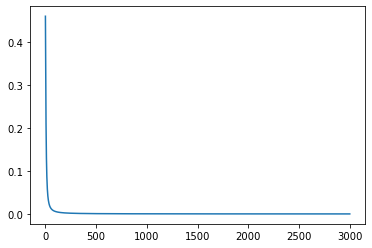

In [39]:
line_first_order = LINE_first(adj_matrix, embedding_dim=2, learning_rate=0.05)
epoch_losses = []

n_epochs = 3000
for epoch in range(1, n_epochs+1):
    epoch_loss = line_first_order.SGD_optim()
    epoch_losses.append(epoch_loss)
    if epoch % 100 == 0:
        print(f'Epoch = {epoch} : loss = {epoch_loss:.5f}')
plt.plot(epoch_losses)

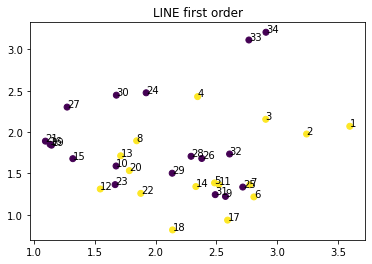

In [127]:
line_first_emb = line_first_order.show_embedding()

plt.title('LINE first order')
plt.scatter(line_first_emb[:,0],line_first_emb[:,1], c=list(map(int, label[:,1])))
for i in range(0, 34):
        plt.text(float(line_first_emb[i,0]), float(line_first_emb[i,1]), i+1 , fontsize=10)
plt.show()

In [122]:
class LINE_second:
    def __init__(self,
                 adj_matrix,
                 embedding_dim=2,
                 learning_rate=0.02):
        
        self.adj_matrix = adj_matrix
        self.embedding_dim = embedding_dim
        self.learning_rate = learning_rate
        
        self.w = np.random.rand(len(adj_matrix),embedding_dim)
        self.w_context = np.random.rand(len(adj_matrix),embedding_dim)
        
        self.epoch_loss = 0.0

    def _softmax(self, a: np.array)-> np.array : 
        c = np.max(a) 
        exp_a = np.exp(a-c)
        sum_exp_a = np.sum(exp_a)
        y = exp_a / sum_exp_a
        return y

    def SGD_optim(self):
        self.epoch_loss = 0.0
        n = len(self.adj_matrix)
        total_iter = np.sum(adj_matrix) / 2
        for i in range(0,n):
            for j in range(i+1, n):
                if self.adj_matrix[i,j] == 1:
                    p2_j_given_i = np.exp(self.w[i] @ self.w_context[j]) \
                    / np.sum(np.exp(self.w_context @ self.w[i]))
                    self.epoch_loss += - np.log(p2_j_given_i) / total_iter
                    w_i_grad = (-self.w_context[j] +\
                                np.exp(self.w_context @ self.w[i]) @ self.w_context/\
                                np.sum(np.exp(self.w_context @ self.w[i])))
                    p2_j_given_i_vec = self.w_context @ self.w[i] / np.sum(np.exp(self.w_context @ self.w[i]))
                    self.w_context -= self.learning_rate * np.diag(p2_j_given_i_vec) @ np.tile(self.w[i], n).reshape(n,-1)
                    self.w_context[j] += self.learning_rate * p2_j_given_i_vec[j] * self.w[i]
                    self.w_context[j] -= self.learning_rate * (-(1-p2_j_given_i)*self.w[i])
                    self.w[i] -= self.learning_rate * w_i_grad
        return self.epoch_loss
    
    def show_embedding(self):
        return self.w

Epoch = 100 : loss = 3.03237
Epoch = 200 : loss = 2.67653
Epoch = 300 : loss = 2.57741
Epoch = 400 : loss = 2.50791
Epoch = 500 : loss = 2.43803
Epoch = 600 : loss = 2.38384
Epoch = 700 : loss = 2.34833
Epoch = 800 : loss = 2.32064
Epoch = 900 : loss = 2.29437
Epoch = 1000 : loss = 2.26923
Epoch = 1100 : loss = 2.24661
Epoch = 1200 : loss = 2.22743
Epoch = 1300 : loss = 2.21168
Epoch = 1400 : loss = 2.19891
Epoch = 1500 : loss = 2.18835
Epoch = 1600 : loss = 2.17884
Epoch = 1700 : loss = 2.16881
Epoch = 1800 : loss = 2.15628
Epoch = 1900 : loss = 2.13907
Epoch = 2000 : loss = 2.11590
Epoch = 2100 : loss = 2.08892
Epoch = 2200 : loss = 2.06468
Epoch = 2300 : loss = 2.04902
Epoch = 2400 : loss = 2.04179
Epoch = 2500 : loss = 2.03975
Epoch = 2600 : loss = 2.04045
Epoch = 2700 : loss = 2.04263
Epoch = 2800 : loss = 2.04571
Epoch = 2900 : loss = 2.04941
Epoch = 3000 : loss = 2.05357


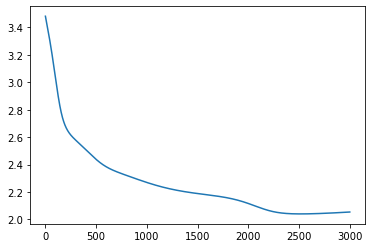

In [136]:
line_second_order = LINE_second(adj_matrix, embedding_dim=2, learning_rate=0.002)
epoch_losses = []

n_epochs = 3000
for epoch in range(1, n_epochs+1):
    epoch_loss = line_second_order.SGD_optim()
    epoch_losses.append(epoch_loss)
    if epoch % 100 == 0:
        print(f'Epoch = {epoch} : loss = {epoch_loss:.5f}')
plt.plot(epoch_losses)

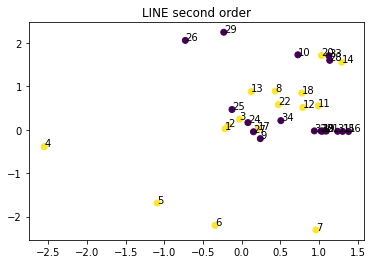

In [137]:
line_second_emb = line_second_order.show_embedding()

plt.title('LINE second order')
plt.scatter(line_second_emb[:,0],line_second_emb[:,1], c=list(map(int, label[:,1])))
for i in range(0, 34):
        plt.text(float(line_second_emb[i,0]), float(line_second_emb[i,1]), i+1 , fontsize=10)
plt.show()